# Object Detection with YOLO in Python (Using OpenCV)
This script demonstrates how to perform object detection in an image using the YOLO (You Only Look Once) model with OpenCV.


## Step 1: Install Required Libraries
First, you need to install the following Python libraries:

In [1]:
pip install opencv-python numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


## Step 1: Install Required Libraries

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 3: Load YOLO Model and Class Names

In [30]:
# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

# Load COCO class names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

## Step 4: Load Image

In [35]:
# Load image
img = cv2.imread('street.png')  # Replace 'image.jpg' with your image path
height, width, channels = img.shape



## Step 5: Prepare Image for YOLO

In [37]:
# Prepare the image for YOLO (resize, convert to blob)
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

## Step 6: Perform Forward Pass to Get Output from YOLO

In [40]:
# Set the blob as input to the network
net.setInput(blob)# Perform forward pass to get the output of the YOLO network
outs = net.forward(output_layers)

## Step 7: Process Detections


In [46]:
# Perform forward pass to get the output of the YOLO network
outs = net.forward(output_layers)

# Process detections
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]  # Extracting scores for each class
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Filter out weak detections
            # Get object bounding box coordinates
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)




## Step 8: Apply Non-maxima Suppression

In [48]:
# Apply Non-maxima Suppression to remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

## Step 9: Draw Bounding Boxes on Image

In [52]:
# Draw bounding boxes
for i in range(len(boxes)):
    if i in indices:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i], 2))
        color = (0, 255, 0)  # Green color for the bounding box

        # Draw the rectangle and label on the image
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label + " " + confidence, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)




## Step 10: Display Image with Detections

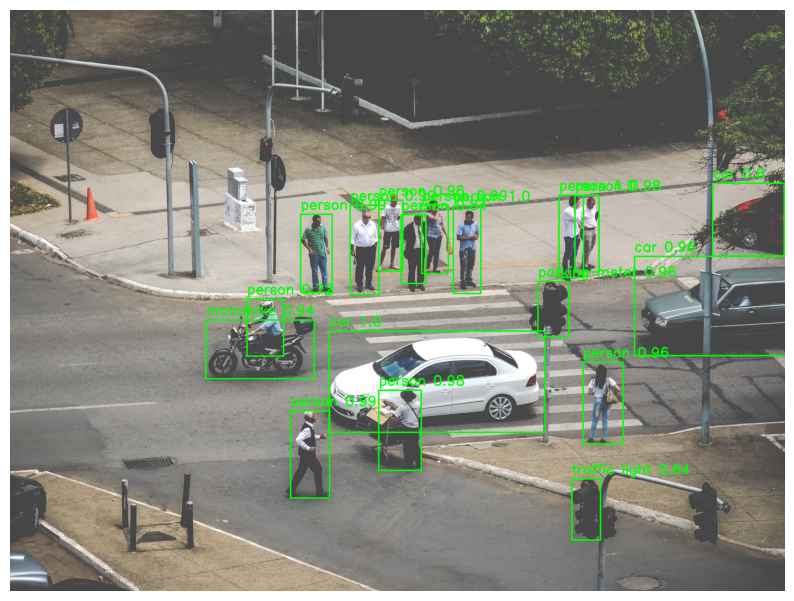

In [54]:
# Convert the image to RGB (since OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## Step 11: Function for Processing Multiple Images

In [ ]:
import cv2
import numpy as np

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load class names
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Function to process an image
def process_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not load image: {image_path}")
        return
    
    height, width, _ = img.shape

    # Preprocess the image for YOLO
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Process detections
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Filter out weak detections
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-maxima Suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes on the image
    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            label = f"{classes[class_ids[i]]} {confidences[i]:.2f}"
            color = (255, 0, 0)  # Blue for bounding box
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    else:
        print("No objects detected in the image.")

    # Display the image with bounding boxes
    cv2.imshow("YOLO Object Detection", img)
    cv2.waitKey(0)  # Wait for any key press to close the window
    cv2.destroyAllWindows()

# Main function to take input
if __name__ == "__main__":
    image_path = input("Enter the path to the image: ")
    process_image(image_path)